## Dados enviesados e machine learning
- https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

In [1]:
# Biblioteca e base de dados
import pandas as pd
import numpy as np
import seaborn as sns
ds = pd.read_csv("house_prices.csv")
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


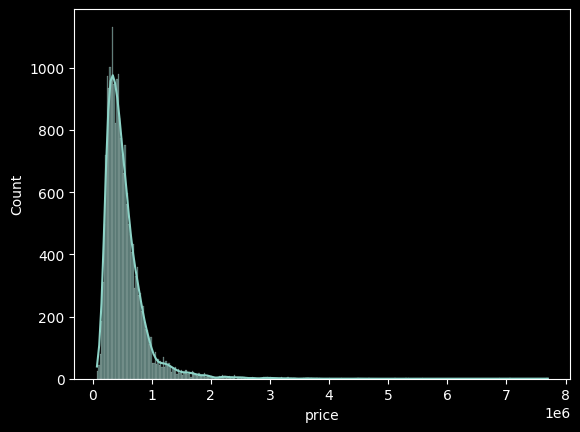

In [2]:
# Gráfico de preço
sns.histplot(ds['price'], kde=True);

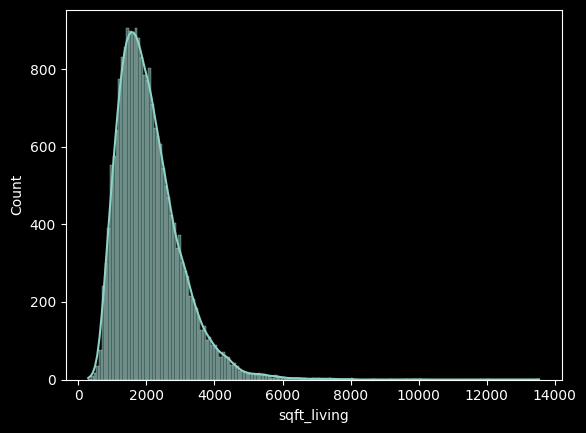

In [3]:
# Gráfico
sns.histplot(ds['sqft_living'], kde=True);

### Sem Tratamento de Dados

In [4]:
# Bibliotecas
from sklearn.linear_model import LinearRegression

In [5]:
# Variável previsora 
X = ds['sqft_living'].values
X

array([1180, 2570,  770, ..., 1020, 1600, 1020], dtype=int64)

In [6]:
# Transformando em matriz
X = X.reshape(-1, 1)
X.shape

(21613, 1)

In [7]:
# Variável de classe
y = ds['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [8]:
# Criando o modelo e treinados
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
# Variável de previsões
previsoes = regressor.predict(X)
previsoes

array([287555.06702452, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [10]:
# Biblioteca e taxa de erro
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(y, previsoes)

173688.27335953104

In [11]:
# Taxa de erro
r2_score(y, previsoes)

0.4928532179037931

### Com Tratamento de Dados

In [12]:
# Transformando os dados 
X_novo = np.log(X)
X_novo

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

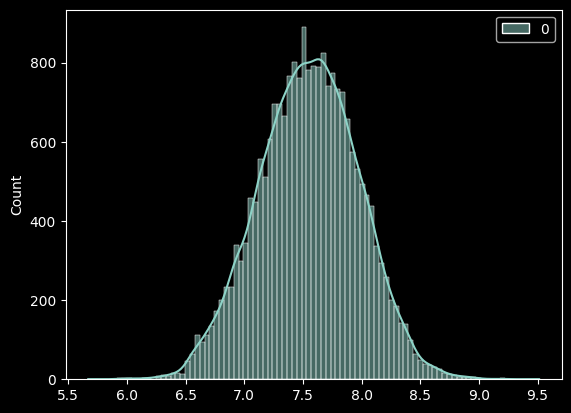

In [13]:
# Gráfico
sns.histplot(X_novo, kde=True);

<AxesSubplot: ylabel='Count'>

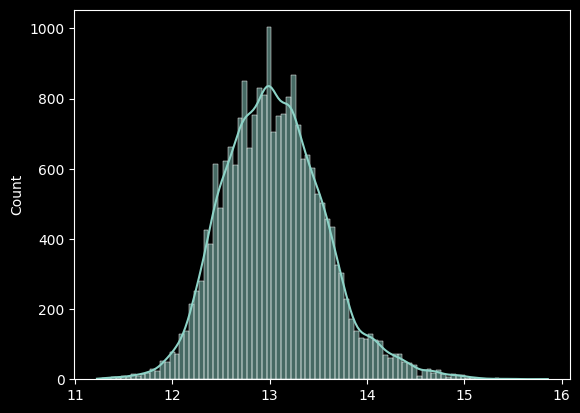

In [14]:
# Transformando os dados 
y_novo = np.log(y)
sns.histplot(y_novo, kde=True)

In [15]:
# Treinado o modelo
regressor = LinearRegression()
regressor.fit(X_novo, y_novo)
previsoes = regressor.predict(X_novo)
mean_absolute_error(y_novo, previsoes)

0.314671784942507

In [16]:
# Taxa de erro
r2_score(y_novo, previsoes)

0.45550706431577015